In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_regions(X,y,classifier,resolution=0.02):
  markers=('s','x','o','4','4')
  colors=('red','blue','lightgreen','gray','cyan')
  cmap=ListedColormap(colors[:len(np.unique(y))])

  x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
  x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
  Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z=Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())

  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

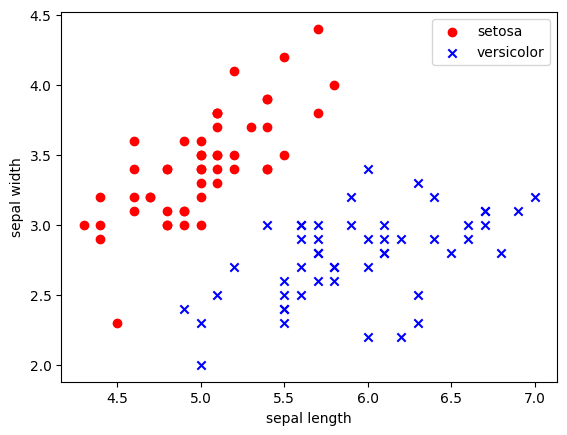

In [9]:
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.DESCR) #https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0

iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species']=[iris.target_names[i] for i in iris.target]
#iris_df.head()

y=iris_df.iloc[0:100,4].values
#y=iris_df.iloc[50:150,4].values
y=np.where(y=='versicolor',-1,1)
#print(y)

X=iris_df.iloc[0:100,[0,1]].values
#X=iris_df.iloc[50:150,[0,2]].values
#print(X)

plt.scatter(X[:50,0],X[:50,1], color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue', marker='x',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

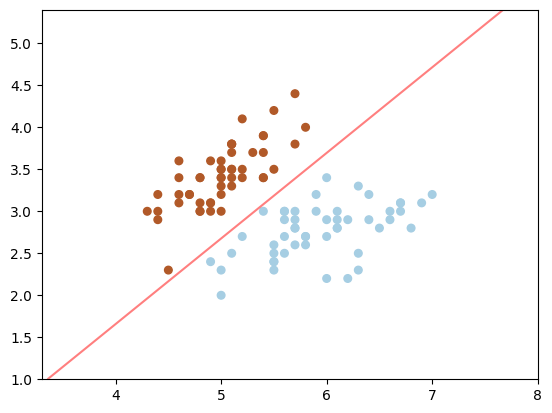

In [10]:
LogRegr=LogisticRegression()
LogRegr.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
#plot_decision_regions(X,y,classifier=LogRegr)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(LogRegr, X, plot_method="contour", colors="r", levels=[0], alpha=0.5, linestyles=["-"], ax=ax)


In [ ]:
LogRegr.predict_proba(X[:3,:])

array([[9.99995488e-01, 4.51201280e-06],
       [9.99397089e-01, 6.02910827e-04],
       [9.99999741e-01, 2.58740376e-07]])